Gradient Descent Logistic Regression Accuracy: 1.0000


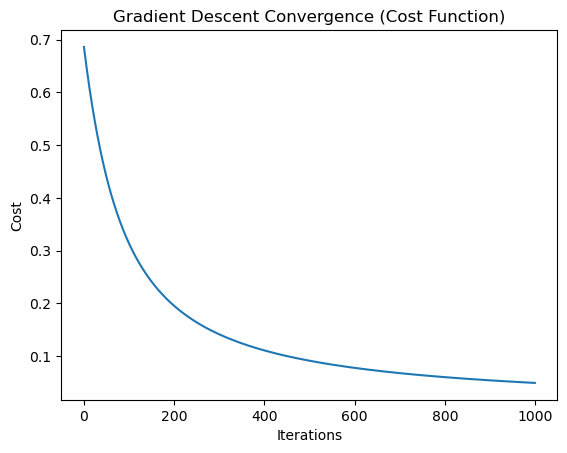

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (logistic loss)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        gradients = (1/m) * np.dot(X.T, (predictions - y))
        theta -= learning_rate * gradients
        
        # Store the cost at each iteration to observe convergence
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, we'll only use classes 0 and 1
X_binary = X[y != 2]
y_binary = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term to the features
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize theta (parameters)
theta_initial = np.zeros(X_train_scaled.shape[1])

# Train the model using gradient descent
theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta_initial, learning_rate=0.01, iterations=1000)

# Make predictions on the test set
y_pred = sigmoid(np.dot(X_test_scaled, theta_final)) >= 0.5
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Descent Logistic Regression Accuracy: {accuracy:.4f}")

# Plot the cost history to visualize convergence
plt.plot(range(1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence (Cost Function)')
plt.show()
